# Tissue Segmentation

Here we shows how to use the function of tissue segmentation.

We support `stereo.image.tissue_cut.SingleStrandDNATissueCut` class for cutting ssDNA from `.tif` image file, and `stereo.image.tissue_cut.RNATissueCut` class for segmenting RNA from GEF/GEM file.

<div class="alert alert-info">

**Preparation**

Before **Cell Segmentation**, **Tissue Segmentation**, certain packages should be installed beforehand.  

Install necessary packages by running commands as below:

        pip install tables

**CPU:**

        pip install tensorflow==2.12.0
        pip install albumentations==1.3.1
        pip install torch==2.4.1+cpu --extra-index-url https://download.pytorch.org/whl
        pip install torchvision==0.19.1+cpu --extra-index-url https://download.pytorch.org/whl

**GPU(CUDA11):**

        pip install tensorflow==2.12.0
        pip install albumentations==1.3.1
        pip install torch==2.4.1+cu118 --extra-index-url https://download.pytorch.org/whl/
        pip install torchvision==0.19.1+cu118 --extra-index-url https://download.pytorch.org/whl/
        pip install onnxruntime-gpu

**GPU(CUDA12):**

        pip install tensorflow==2.12.0
        pip install albumentations==1.3.1
        pip install torch==2.4.1+cu124 --extra-index-url https://download.pytorch.org/whl/
        pip install torchvision==0.19.1+cu124 --extra-index-url https://download.pytorch.org/whl/
        pip install onnxruntime-gpu

</div>

<div class="alert alert-info">

**Note**

The images used here must have been calibrated.

</div>

## Tissue segmentation from .TIFF image

We now support 4 staining types of **.TIFF** image: **ssDNA**, **DAPI**,  **HE** and **mIF**, and have two models to process these four types images:

        1. tissueseg_bcdu_H&E_20240201_tf.onnx: be used for staining type HE.

        2. tissueseg_bcdu_SDI_230523_tf.onnx: be used for others staining types.

The following part shows a case to segment a ssDNA-type image, and please download our [example data](http://upload.dcs.cloud:8090/share/bb6fab82-2c16-46b2-a95e-6931338f31bf).

Download the [deep learning model](http://upload.dcs.cloud:8090/share/bb6fab82-2c16-46b2-a95e-6931338f31bf). It is assumed that the local storage path of the model is `'../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx'`.

More detail in [stereo.image.tissue_cut.SingleStrandDNATissueCut](../content/stereo.image.tissue_cut.SingleStrandDNATissueCut.__init__.html).

In [1]:
from stereo.image.tissue_cut import SingleStrandDNATissueCut

# Initial the TissueCut object
ssDNA_tissue_cut = SingleStrandDNATissueCut(
    src_img_path='../data/SS200000135TL_D1_regist.tif',
    dst_img_path='./tissue_seg/result',
    model_path='../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx',
    staining_type='ssDNA',
    gpu='0' # set to -1 to run on cpu
)

# Real do the image transforming
ssDNA_tissue_cut.tissue_seg()

[INFO 20240321-17-01-39 p96955 __init__ tissue_segmentation.py:33] start loading model weight


INFO:cellbin.utils.clog:start loading model weight


[INFO 20240321-17-01-39 p96955 _f_load_model onnx_net.py:29] loading weight from ../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx


INFO:cellbin.utils.clog:loading weight from ../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx


[INFO 20240321-17-01-41 p96955 _f_load_model onnx_net.py:40] onnx work on gpu 0


2024-03-21 17:01:40.896173342 [W:onnxruntime:, session_state.cc:1162 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-03-21 17:01:40.896213047 [W:onnxruntime:, session_state.cc:1164 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
INFO:cellbin.utils.clog:onnx work on gpu 0


[INFO 20240321-17-01-41 p96955 __init__ tissue_segmentation.py:35] end loading model weight


INFO:cellbin.utils.clog:end loading model weight


[INFO 20240321-17-01-43 p96955 run tissue_segmentation.py:46] start tissue seg


INFO:cellbin.utils.clog:start tissue seg


[INFO 20240321-17-01-57 p96955 run tissue_segmentation.py:48] end tissue seg


INFO:cellbin.utils.clog:end tissue seg


['./tissue_seg/result/SS200000135TL_D1_regist_tissue_cut.tif']

## Tissue segmentation from GEM/GEF

More detail in [stereo.image.tissue_cut.RNATissueCut](../content/stereo.image.tissue_cut.RNATissueCut.__init__.html)

Model `tissueseg_bcdu_RNA_220909_tf.onnx` is used for this part.

In [2]:
from stereo.image.tissue_cut import RNATissueCut

#GEF
rna_tissue_cut = RNATissueCut(
    dst_img_path='./tissue_seg/result',
    gef_path='../data/SS200000135TL_D1.raw.gef',
    model_path='../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx',
    gpu='0' # set to -1 to run on cpu
)
rna_tissue_cut.tissue_seg()

#GEM
# rna_tissue_cut = RNATissueCut(
#     dst_img_path='../data/tissue_seg/result',
#     gem_path='../data/SS200000135TL_D1.raw.gem',
#     model_path='../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx',
#     gpu='0' # set to -1 to run on cpu
# )
# rna_tissue_cut.tissue_seg()

[INFO 20240321-17-01-57 p96955 __init__ tissue_segmentation.py:33] start loading model weight


INFO:cellbin.utils.clog:start loading model weight


[INFO 20240321-17-01-57 p96955 _f_load_model onnx_net.py:29] loading weight from ../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx


INFO:cellbin.utils.clog:loading weight from ../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx


[INFO 20240321-17-01-57 p96955 _f_load_model onnx_net.py:40] onnx work on gpu 0


2024-03-21 17:01:57.743670991 [W:onnxruntime:, session_state.cc:1162 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-03-21 17:01:57.743691209 [W:onnxruntime:, session_state.cc:1164 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
INFO:cellbin.utils.clog:onnx work on gpu 0


[INFO 20240321-17-01-57 p96955 __init__ tissue_segmentation.py:35] end loading model weight


INFO:cellbin.utils.clog:end loading model weight


[INFO 20240321-17-02-33 p96955 run tissue_segmentation.py:46] start tissue seg


INFO:cellbin.utils.clog:start tissue seg


[INFO 20240321-17-02-44 p96955 run tissue_segmentation.py:48] end tissue seg


INFO:cellbin.utils.clog:end tissue seg


['./tissue_seg/result/SS200000135TL_D1.raw_tissue_cut.tif']

## New BGEF

Function `stereo.tools.tissue_extraction.tissue_extration_to_bgef` extracts the tissue segmentation BGEF file of bin1 from the corresponding raw BGEF file of bin1, depending on the result mask generated by tissue segmentation and the registered ssDNA tif of the bin 1 RNA GEF file.

### Extraction with ssDNA image

Now show you how to extract the GEF with a ssDNA image:

In [3]:
import stereo as st

That's how raw GEF originally looks like.

[2024-03-21 17:03:09][Stereo][96955][MainThread][139672358180672][reader][1090][INFO]: read_gef begin ...


path:../data/SS200000135TL_D1.raw.gef bin:100
               generateBinInfo - 26.050000 cpu sec


[2024-03-21 17:03:26][Stereo][96955][MainThread][139672358180672][reader][1268][INFO]: the matrix has 44775 cells, and 24670 genes.
[2024-03-21 17:03:26][Stereo][96955][MainThread][139672358180672][reader][1269][INFO]: read_gef end.
[2024-03-21 17:03:26][Stereo][96955][MainThread][139672358180672][st_pipeline][41][INFO]: start to run cal_qc...
[2024-03-21 17:03:27][Stereo][96955][MainThread][139672358180672][st_pipeline][44][INFO]: cal_qc end, consume time 0.4893s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

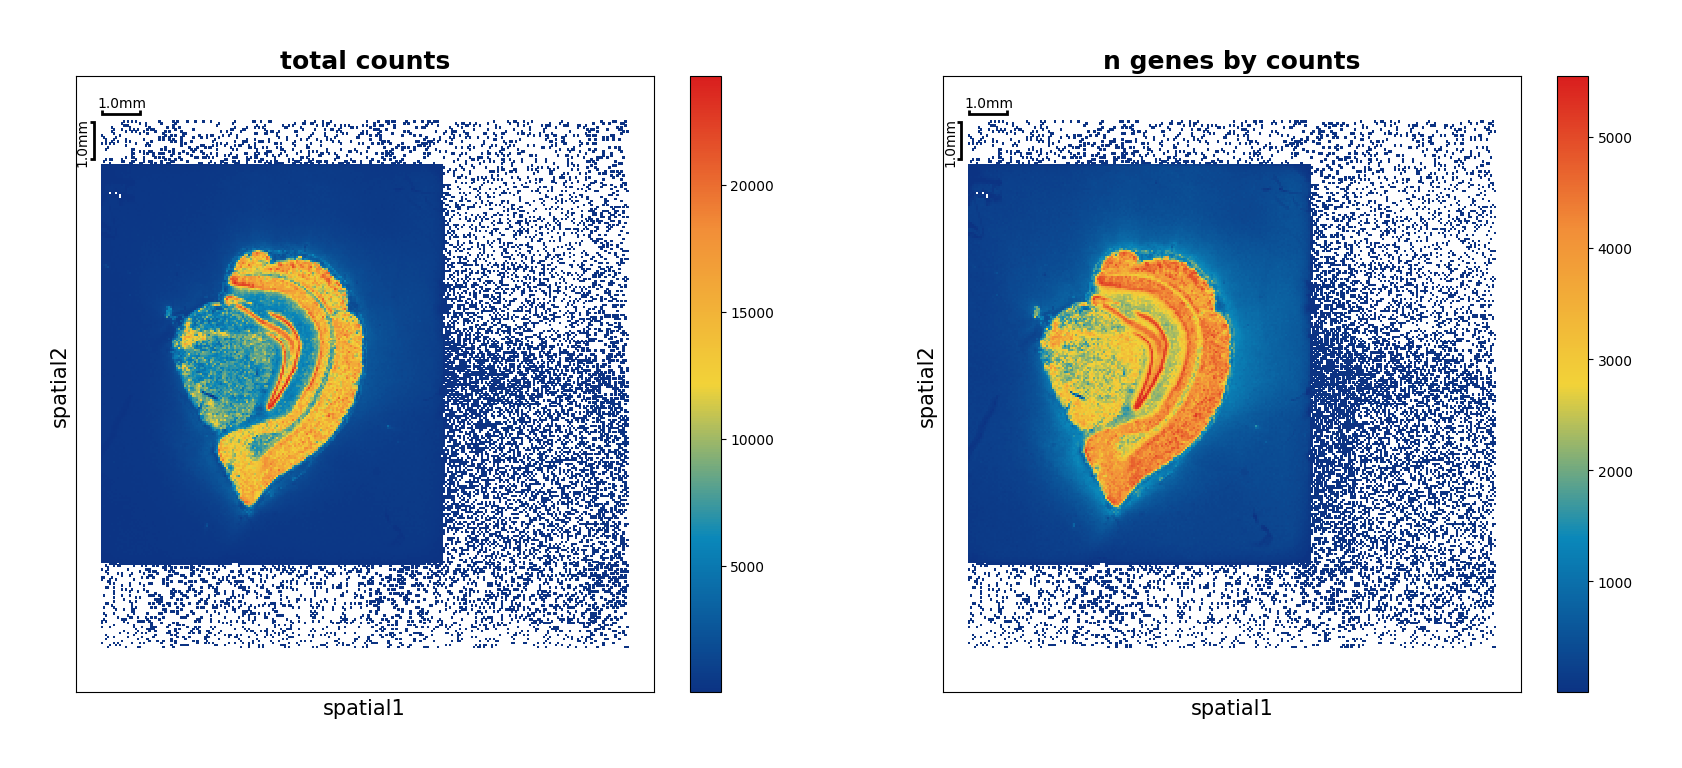

In [5]:
st_exp_data = st.io.read_gef('../data/SS200000135TL_D1.raw.gef', bin_size=100)
st_exp_data.tl.cal_qc()
st_exp_data.plt.spatial_scatter()

Then, start to extract the tissue area by giving a registered `.tif`.

In [6]:
from stereo.tools.tissue_extraction import tissue_extraction_to_bgef

# ssDNA
tissue_extraction_to_bgef(
    src_img_path='../data/SS200000135TL_D1_regist.tif',
    src_gef_path='../data/SS200000135TL_D1.raw.gef',
    dst_bgef_path='./SS200000135TL_D1.tissue.gef',
    dst_mask_dir_path='./tissue_seg/result',
    staining_type='ssDNA',
    model_path='../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx',
    gpu='0' # set to -1 to run on cpu
)

[INFO 20240321-17-03-29 p96955 __init__ tissue_segmentation.py:33] start loading model weight


INFO:cellbin.utils.clog:start loading model weight


[INFO 20240321-17-03-29 p96955 _f_load_model onnx_net.py:29] loading weight from ../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx


INFO:cellbin.utils.clog:loading weight from ../data/seg_models/tissueseg_bcdu_SDI_230523_tf.onnx


[INFO 20240321-17-03-29 p96955 _f_load_model onnx_net.py:40] onnx work on gpu 0


INFO:cellbin.utils.clog:onnx work on gpu 0
2024-03-21 17:03:29.745706293 [W:onnxruntime:, session_state.cc:1162 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-03-21 17:03:29.745735384 [W:onnxruntime:, session_state.cc:1164 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


[INFO 20240321-17-03-29 p96955 __init__ tissue_segmentation.py:35] end loading model weight


INFO:cellbin.utils.clog:end loading model weight


[INFO 20240321-17-03-30 p96955 run tissue_segmentation.py:46] start tissue seg


INFO:cellbin.utils.clog:start tissue seg


[INFO 20240321-17-03-43 p96955 run tissue_segmentation.py:48] end tissue seg


INFO:cellbin.utils.clog:end tissue seg
[2024-03-21 17:03:43][Stereo][96955][MainThread][139672358180672][tissue_extraction][89][INFO]: tissue_cut finish, mask file is saved at ./tissue_seg/result/SS200000135TL_D1_regist_tissue_cut.tif
[2024-03-21 17:03:50][Stereo][96955][MainThread][139672358180672][tissue_extraction][95][INFO]: gef extraction finish, extracted gef save at ./SS200000135TL_D1.tissue.gef


bit space sample is : 8
img row:26459 col:26459
minx:0 miny:0 maxx:26458 maxy:26458
gene:24670 geneexp:76210617
readbgef - elapsed time: 2441.87584 ms
getmaskgenedata_bgef thread time elapsed time: 2.12947 ms
new gcnt:24286 new gexp:62551475
getmaskgenedata_bgef - elapsed time: 1945.82985 ms
writebgef - elapsed time: 1358.90096 ms


Read BGEF file after extraction to see what have been done on it.

[2024-03-21 17:04:08][Stereo][96955][MainThread][139672358180672][reader][1090][INFO]: read_gef begin ...


path:./SS200000135TL_D1.tissue.gef bin:100
               generateBinInfo - 20.200000 cpu sec


[2024-03-21 17:04:19][Stereo][96955][MainThread][139672358180672][reader][1268][INFO]: the matrix has 8993 cells, and 24286 genes.
[2024-03-21 17:04:19][Stereo][96955][MainThread][139672358180672][reader][1269][INFO]: read_gef end.
[2024-03-21 17:04:19][Stereo][96955][MainThread][139672358180672][st_pipeline][41][INFO]: start to run cal_qc...
[2024-03-21 17:04:20][Stereo][96955][MainThread][139672358180672][st_pipeline][44][INFO]: cal_qc end, consume time 0.3661s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

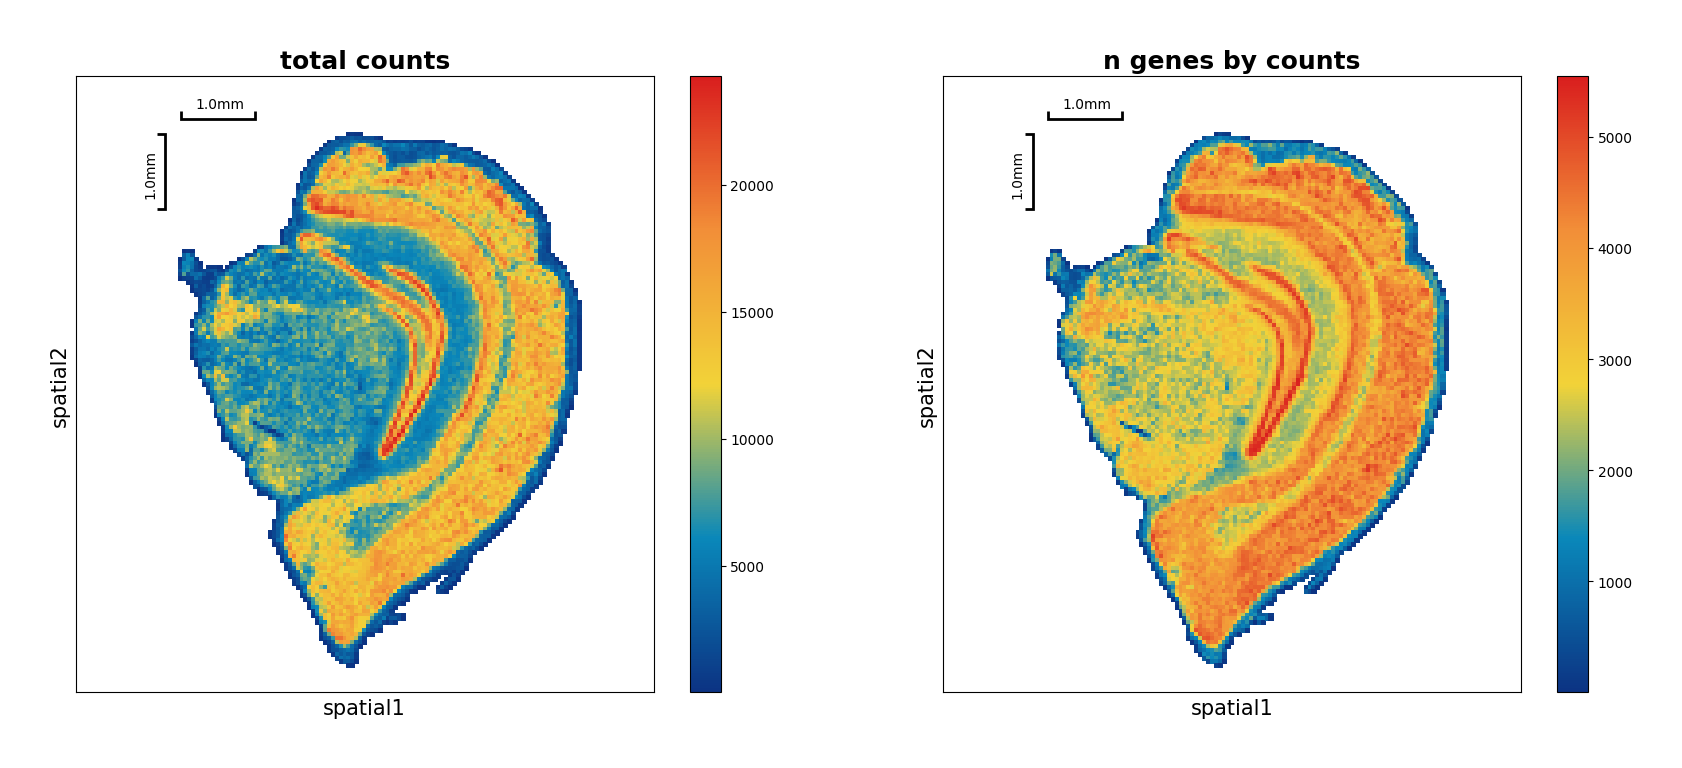

In [8]:
st_exp_data = st.io.read_gef('./SS200000135TL_D1.tissue.gef', bin_size=100)
st_exp_data.tl.cal_qc()
st_exp_data.plt.spatial_scatter()

### Extraction only with expression matrix

Change `staining_type` to **RNA**, and use gene expression matrix to extract GEF.

In [9]:
tissue_extraction_to_bgef(
    src_gef_path='../data/SS200000135TL_D1.raw.gef',
    dst_bgef_path='./SS200000135TL_D1.tissue.gef',
    dst_mask_dir_path='./tissue_seg/result',
    staining_type='RNA',
    model_path='../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx',
    gpu='0' # set to -1 to run on cpu
)

[INFO 20240321-17-04-21 p96955 __init__ tissue_segmentation.py:33] start loading model weight


INFO:cellbin.utils.clog:start loading model weight


[INFO 20240321-17-04-21 p96955 _f_load_model onnx_net.py:29] loading weight from ../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx


INFO:cellbin.utils.clog:loading weight from ../data/seg_models/tissueseg_bcdu_rna_220909_tf.onnx


[INFO 20240321-17-04-21 p96955 _f_load_model onnx_net.py:40] onnx work on gpu 0


2024-03-21 17:04:21.310511898 [W:onnxruntime:, session_state.cc:1162 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-03-21 17:04:21.310530619 [W:onnxruntime:, session_state.cc:1164 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
INFO:cellbin.utils.clog:onnx work on gpu 0


[INFO 20240321-17-04-21 p96955 __init__ tissue_segmentation.py:35] end loading model weight


INFO:cellbin.utils.clog:end loading model weight


[INFO 20240321-17-04-55 p96955 run tissue_segmentation.py:46] start tissue seg


INFO:cellbin.utils.clog:start tissue seg


[INFO 20240321-17-05-05 p96955 run tissue_segmentation.py:48] end tissue seg


INFO:cellbin.utils.clog:end tissue seg
[2024-03-21 17:05:06][Stereo][96955][MainThread][139672358180672][tissue_extraction][89][INFO]: tissue_cut finish, mask file is saved at ./tissue_seg/result/SS200000135TL_D1.raw_tissue_cut.tif
[2024-03-21 17:05:13][Stereo][96955][MainThread][139672358180672][tissue_extraction][95][INFO]: gef extraction finish, extracted gef save at ./SS200000135TL_D1.tissue.gef


bit space sample is : 8
img row:26459 col:26459
minx:0 miny:0 maxx:26458 maxy:26458
gene:24670 geneexp:76210617
readbgef - elapsed time: 2436.14483 ms
getmaskgenedata_bgef thread time elapsed time: 2.30181 ms
new gcnt:24311 new gexp:63274175
getmaskgenedata_bgef - elapsed time: 1951.82507 ms
writebgef - elapsed time: 1542.28937 ms
